In [26]:
import pandas as pd
import numpy as np
import pyspark as spark
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy import stats

auth = r"D:\DocumentsSte\VSCode\Proj1Streamlit\resources\car_prices.csv"

df = pd.read_csv(auth)

df = df.dropna()
df = df.drop_duplicates()

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [ ]:
df_make_value = df.groupby(["make"])[['sellingprice']].agg(['mean','sum','std'])

df_make_volume = df.groupby(["make"])[['vin']].agg(['count'])

top_brand_value = df_make_value['sellingprice']['sum'].idxmax()
top_sales_value = df_make_value['sellingprice']['sum'].max()

top_brand_volume = df_make_volume['vin']['count'].idxmax()
top_sales_volume = df_make_volume['vin']['count'].max()

print(f"Highest selling brand: {top_brand_value} with total sales: ${top_sales_value:,.2f} and total sold vehicles: {top_sales_volume:,.2f}")



In [ ]:
df_make_value = df.groupby(["make","model"])[['sellingprice']].agg(['mean','sum','std'])

df_make_volume = df.groupby(["make","model"])[['vin']].agg(['count'])

top_brand_value = df_make_value['sellingprice']['sum'].idxmax()
top_sales_value = df_make_value['sellingprice']['sum'].max()

top_brand_volume = df_make_volume['vin']['count'].idxmax()
top_sales_volume = df_make_volume['vin']['count'].max()

print(f"Highest selling brand/model: {top_brand_value} with total sales: ${top_sales_value:,.2f}")

print(f"Highest selling brand/model: {top_brand_volume} with total sold vehicles: {top_sales_volume:,.2f}")

In [ ]:
# group by body and make and get the sum of sellingprice
df_body_make_value = df.groupby(["body","make"])[['sellingprice']].agg(['sum'])

# get the id of the max selling price for each body type
# apply(lambda x: x[1]) gets a element of a list or tuple in case of x[0] is the first element of the tuple
max_sales_per_body1 = df_body_make_value['sellingprice']['sum'].groupby("body").idxmax().apply(lambda x: x[1])

# get the max selling price for each body type
max_sales_per_body2 = df_body_make_value['sellingprice']['sum'].groupby("body").max()

max_sales_per_body = pd.merge(max_sales_per_body1, max_sales_per_body2, left_index=True, right_index=True)

#change name of columns
max_sales_per_body.rename(columns={'sum_x': 'Make','sum_y': 'Total_SellingPrice'}, inplace=True)

max_sales_per_body

In [ ]:
# group by body, make and model and get the sum of sellingprice
df_body_make_value = df.groupby(["body","make","model"])[['sellingprice']].agg(['sum'])

# get the id of the max selling price for each body type
# apply(lambda x: x[1]) gets a element of a list or tuple in case of x[0] is the first element of the tuple
max_sales_per_body1 = df_body_make_value['sellingprice']['sum'].groupby("body").idxmax().apply(lambda x: x[1]+'/'+x[2])

# get the max selling price for each body type
max_sales_per_body2 = df_body_make_value['sellingprice']['sum'].groupby("body").max()

max_sales_per_body = pd.merge(max_sales_per_body1, max_sales_per_body2, left_index=True, right_index=True)

#change name of columns
max_sales_per_body.rename(columns={'sum_x': 'Model','sum_y': 'Total_SellingPrice'}, inplace=True)

max_sales_per_body

In [ ]:
make_filtered = {'Volvo','BMW'}

# Filter DataFrame if at least one category is selected
if make_filtered:
    filtered_df = df[df['make'].isin(make_filtered)]
else:
    filtered_df = df  # Show all data if no selection

filtered_df

In [ ]:
# group by body and make and get the sum of sellingprice
df_seller_value = df.groupby(["seller"])[['sellingprice']].agg(['sum'])

df_seller_value1 = df.groupby("seller")[["sellingprice"]].sum().sort_values(by="sellingprice", ascending=False)

df_seller_value1

In [ ]:
df_best_selling_model_value = df.groupby(["body","make","model","year"])[["year","sellingprice"]].agg(['mean',"sum"])
# Flatten the MultiIndex columns
df_best_selling_model_value.columns = ['_'.join(col).strip() for col in df_best_selling_model_value.columns]

df_best_selling_model_value1 = df.groupby(["body","make","model"])[["sellingprice"]].sum()

#.rename(columns={'sellingprice_x': 'Total Sales Model','sellingprice_y': 'Year Sales Model'}, inplace=True)
#.sort_values(by=["Total Sales Model"],ascending=False)


df_best_selling_model = df_best_selling_model_value.merge(df_best_selling_model_value1, on=["body","make","model"])

df_best_selling_model = df_best_selling_model.drop(['year_sum', 'sellingprice_mean',], axis=1)

df_best_selling_model.rename(columns={'year_mean': 'Year','sellingprice': 'Total Sales Model','sellingprice_sum': 'Year Sales Model'}, inplace=True)

df_best_selling_model.sort_values(by=["Total Sales Model","Year"],ascending=[False ,False])

df_best_selling_model



In [ ]:
df1 = df

# Convert to datetime format
df1['saledate'] = pd.to_datetime(df1['saledate'], errors='coerce')

# Extract only the date part (YYYY-MM-DD)
df1['saledate'] = df1['saledate'].dt.date

# calculates the average of the "Selling Price" and "mmr" columns for each unique value in the "saledate" column
df1 = df1.groupby('saledate').agg({'sellingprice': 'mean', 'mmr': 'mean'}).reset_index()

df1

Text(0.5, 1.0, 'Seaborn Scatter Plot')

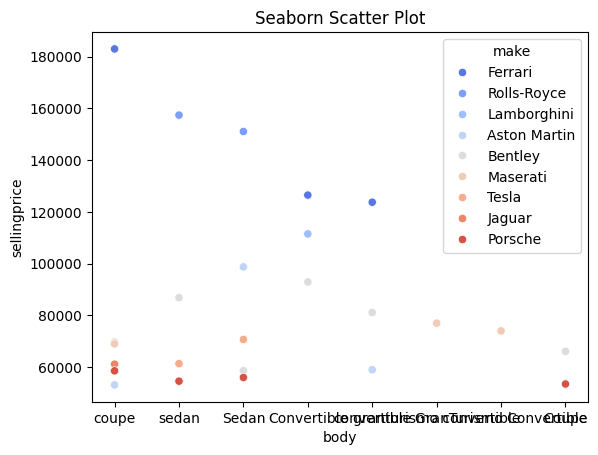

In [34]:
df2 = df

# calculates the average of the "Selling Price" and "mmr" columns for each unique value in the "saledate" column
df2 = df2.groupby(['make','body',]).agg({'sellingprice': 'mean'}).reset_index()

df2 = df2.nlargest(25, 'sellingprice')

# Create a Seaborn scatter plot
fig, ax = plt.subplots()
sns.scatterplot(x=df2['body'], y=df2['sellingprice'], hue=df2['make'], palette="coolwarm", ax=ax)
ax.set_title("Seaborn Scatter Plot")

# # Display in Streamlit
# st.pyplot(fig)


<Axes: xlabel='Year_month', ylabel='sellingprice'>

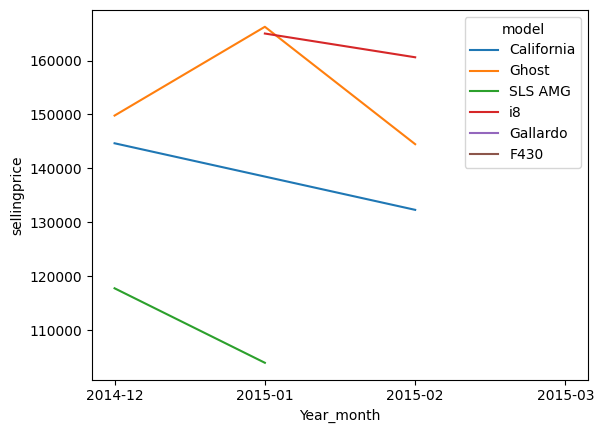

In [ ]:
df3 = df

# Convert to datetime format
df3['saledate'] = pd.to_datetime(df3['saledate'], errors='coerce')

# Extract only the date part (YYYY-MM-DD)
df3['Year_month'] = df3['saledate'].dt.strftime('%Y-%m')

df3.sort_values(by=["saledate"],ascending=[True])

df3 = df3.dropna(subset=['saledate'])


df3 = df3.groupby(['Year_month',"model"]).agg({'sellingprice': 'mean'}).reset_index()

df3_top5 = df3.nlargest(10, 'sellingprice')

df3 = df3[df3["model"].isin(df3_top5["model"])]

df3.sort_values(by=["Year_month"],ascending=[True])

# create a seaborn line plot

fig2, ax = plt.subplots()

sns.lineplot(x="Year_month", y="sellingprice", hue="model" ,data=df3)



<Axes: xlabel='Year_month', ylabel='vin'>

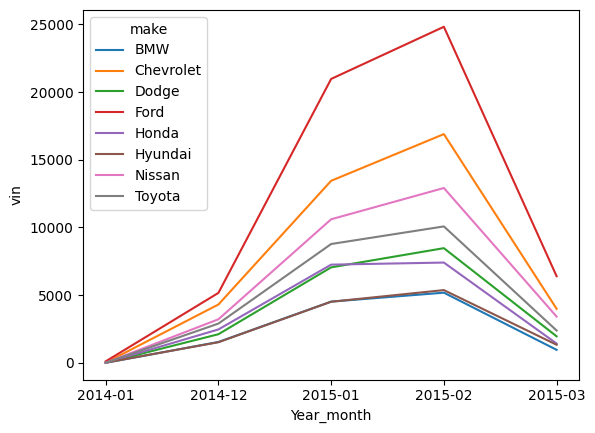

In [19]:
df4 = df

# Convert to datetime format
df4['saledate'] = pd.to_datetime(df4['saledate'], errors='coerce')

# Extract only the date part (YYYY-MM-DD)
df4['Year_month'] = df4['saledate'].dt.strftime('%Y-%m')

df4.sort_values(by=["saledate"],ascending=[True])

df4 = df4.dropna(subset=['saledate'])


df4 = df4.groupby(['Year_month',"make"]).agg({'vin': 'count'}).reset_index()

df4_top = df4.nlargest(15, 'vin')

df4 = df4[df4["make"].isin(df4_top["make"])]

df4.sort_values(by=["Year_month"],ascending=[True])

# create a seaborn line plot

fig2, ax = plt.subplots()

sns.lineplot(x="Year_month", y="vin", hue="make" ,data=df4)


C:\Users\steph\AppData\Local\Temp\ipykernel_26420\1840434995.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df5['odometer'], y=df5['sellingprice'], palette="coolwarm", ax=ax)


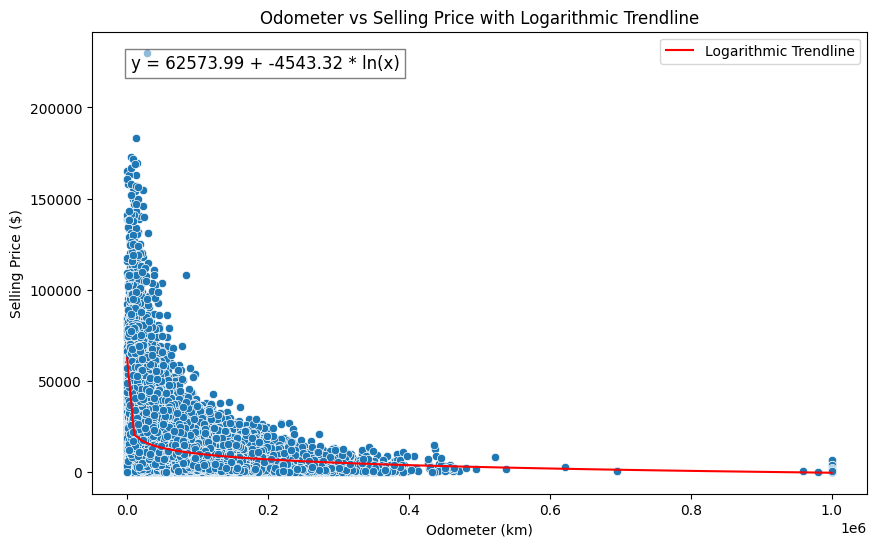

Equation of the logarithmic curve: y = 62573.99 + -4543.32 * ln(x)
R-squared value: 0.2366


In [35]:
df5 = df

df5 = df5.dropna(subset=['odometer', 'sellingprice'])

# Drop NaN values and ensure positive odometer values (log is undefined for non-positive values)
df5 = df5.dropna(subset=['odometer', 'sellingprice'])
df5 = df5[df5['odometer'] > 0]  # Ensure positive values for log transformation

# Apply logarithm transformation to odometer
df5['log_odometer'] = np.log(df5['odometer'])

# Perform linear regression: sellingprice = a + b * log(odometer)
b, a, r_value, p_value, std_err = stats.linregress(df5['log_odometer'], df5['sellingprice'])

# Define the logarithmic function
def log_func(x):
    return a + b * np.log(x)

# Generate trendline values
x_vals = np.linspace(df5['odometer'].min(), df5['odometer'].max(), 100)
y_vals = log_func(x_vals)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df5['odometer'], y=df5['sellingprice'], palette="coolwarm", ax=ax)

# Plot logarithmic trend curve
plt.plot(x_vals, y_vals, color='red', label='Logarithmic Trendline')

# Display the logarithmic equation
equation_text = f"y = {intercept:.2f} + {slope:.2f} * ln(x)"
plt.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Labels and legend
ax.set_title("Odometer vs Selling Price with Logarithmic Trendline")
ax.set_xlabel("Odometer (km)")
ax.set_ylabel("Selling Price ($)")
plt.legend()
plt.show()

# Print equation details
print(f"Equation of the logarithmic curve: y = {intercept:.2f} + {slope:.2f} * ln(x)")
print(f"R-squared value: {r_value**2:.4f}")  # Goodness of fit measure


C:\Users\steph\AppData\Local\Temp\ipykernel_26420\4072928799.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


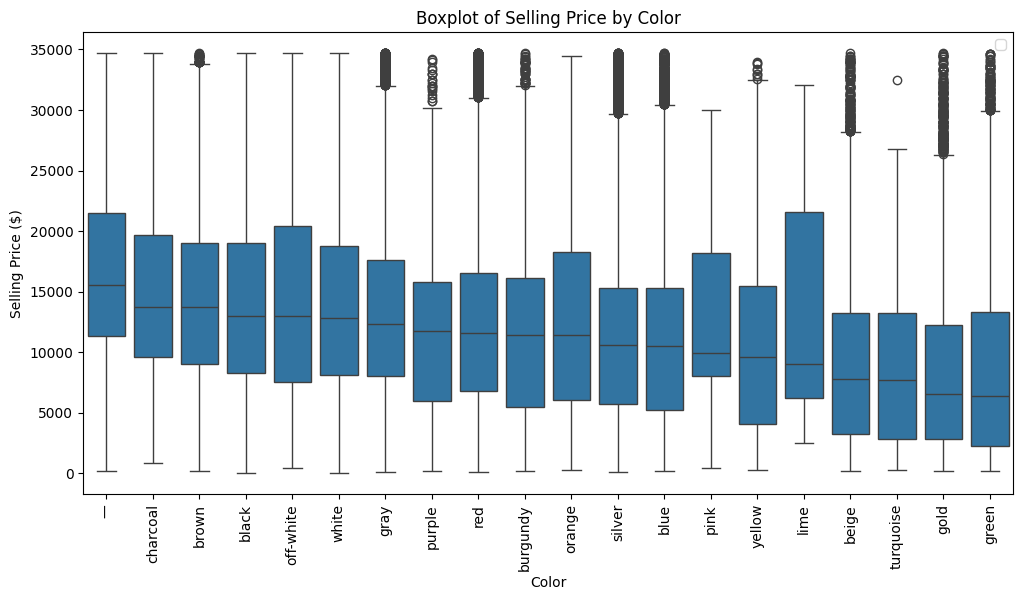

In [52]:
df6 = df

df6 = df6.dropna(subset=["sellingprice"])

q1 = df6["sellingprice"].quantile(0.25)
q3 = df6["sellingprice"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df6 = df6[(df6["sellingprice"] >= lower_bound) & (df6["sellingprice"] <= upper_bound)]

# Calculate median selling price for each color and sort in descending order
median_order = df6.groupby("color")["sellingprice"].median().sort_values(ascending=False).index

# Create a Seaborn Box Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df6["color"], y=df6["sellingprice"], order=median_order, data=df6)  # Box plot
ax.set_title("Boxplot of Selling Price by Color")
ax.set_xlabel("Color")
ax.set_ylabel("Selling Price ($)")
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.legend()
plt.show()


# # Display in Streamlit
# st.pyplot(fig)


C:\Users\steph\AppData\Local\Temp\ipykernel_26420\2256682957.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


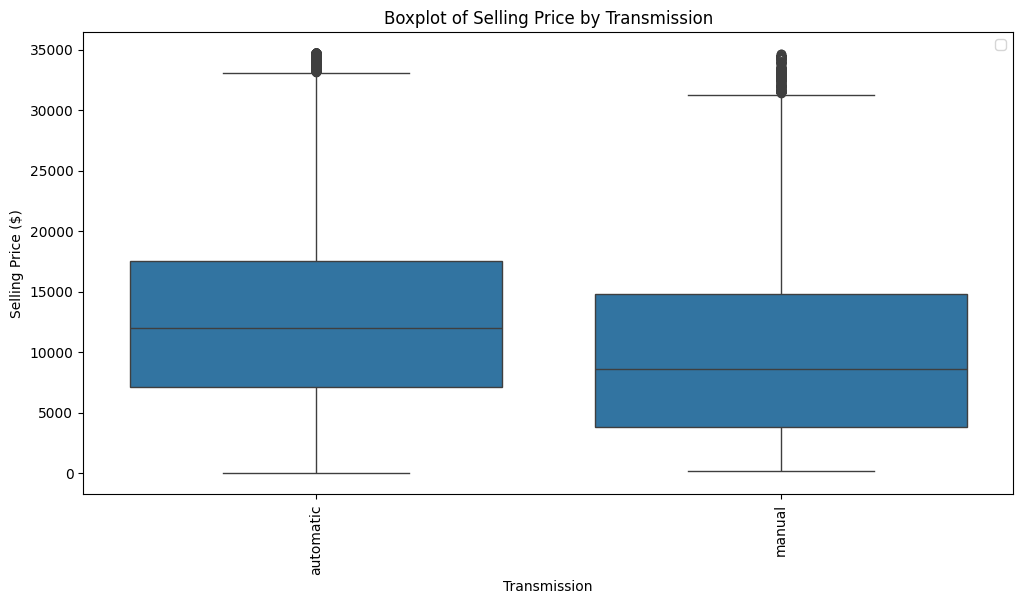

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [ ]:
df7 = df

df7 = df7.dropna(subset=["sellingprice"])

q1 = df7["sellingprice"].quantile(0.25)
q3 = df7["sellingprice"].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df7 = df7[(df7["sellingprice"] >= lower_bound) & (df7["sellingprice"] <= upper_bound)]

median_order7 = df7.groupby("transmission")["sellingprice"].median().sort_values(ascending=False).index

# Create a Seaborn Box Plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df7["transmission"], y=df7["sellingprice"],order=median_order7, data=df7)  # Box plot
ax.set_title("Boxplot of Selling Price by Transmission")
ax.set_xlabel("Transmission")
ax.set_ylabel("Selling Price ($)")
plt.xticks(rotation=90) # Rotate x-axis labels vertically
plt.legend()
plt.show()


# # Display in Streamlit
# st.pyplot(fig)


C:\Users\steph\AppData\Local\Temp\ipykernel_26420\3917036399.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df8['condition'], y=df8['sellingprice'], palette="coolwarm", ax=ax)


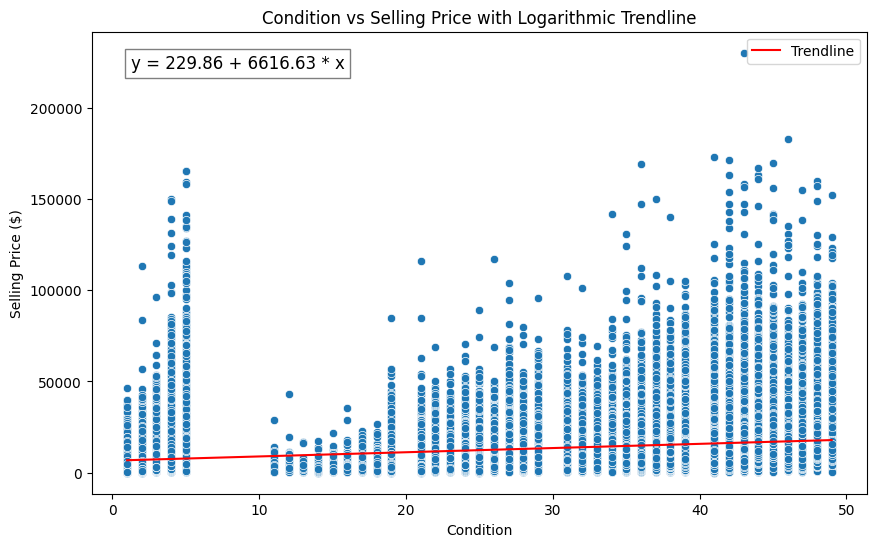

Equation of the logarithmic curve: y = 229.86 + 6616.63 * x
R-squared value: 0.1009


In [62]:
df8 = df

# Drop NaN values and ensure positive odometer values (log is undefined for non-positive values)
df8 = df8.dropna(subset=['condition', 'sellingprice'])
df8 = df8[df8['condition'] > 0]  # Ensure positive values for log transformation

# Perform linear regression: sellingprice = a + b * condition
b, a, r_value, p_value, std_err = stats.linregress(df8['condition'], df8['sellingprice'])

# Define the logarithmic function
def func(x):
    return a + b * x

# Generate trendline values
x_vals = np.linspace(df8['condition'].min(), df8['condition'].max(), 100)
y_vals = func(x_vals)

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df8['condition'], y=df8['sellingprice'], palette="coolwarm", ax=ax)

# Plot logarithmic trend curve
plt.plot(x_vals, y_vals, color='red', label='Trendline')

# Display the logarithmic equation
equation_text = f"y = {b:.2f} + {a:.2f} * x"
plt.text(0.05, 0.95, equation_text, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Labels and legend
ax.set_title("Condition vs Selling Price with Logarithmic Trendline")
ax.set_xlabel("Condition")
ax.set_ylabel("Selling Price ($)")
plt.legend()
plt.show()

# Print equation details
print(f"Equation of the logarithmic curve: y = {b:.2f} + {a:.2f} * x")
print(f"R-squared value: {r_value**2:.4f}")  # Goodness of fit measure

